## Introduction
Way back in the late 1920s John Von Neumann established the main problem in game theory that has remained relevant still today:

Players s1, s2, ..., sn are playing a given game G. Which moves should player sm play to achieve the best possible outcome?

Shortly after, problems of this kind grew into a challenge of great significance for development of one of today's most popular fields in computer science - artificial intelligence. Some of the greatest accomplishments in artificial intelligence are achieved on the subject of strategic games - world champions in various strategic games have already been beaten by computers, e.g. in Chess, Checkers, Backgammon, and most recently (2016) even Go.

Although these programs are very successful, their way of making decisions is a lot different than that of humans. The majority of these programs are based on efficient searching algorithms, and since recently on machine learning as well.

The Minimax algorithm is a relatively simple algorithm used for optimal decision-making in game theory and artificial intelligence. Again, since these algorithms heavily rely on being efficient, the vanilla algorithm's performance can be heavily improved by using alpha-beta pruning - we'll cover both in this article.

Although we won't analyze each game individually, we'll briefly explain some general concepts that are relevant for two-player non-cooperative zero-sum symmetrical games with perfect information - Chess, Go, Tic-Tac-Toe, Backgammon, Reversi, Checkers, Mancala, 4 in a row etc...

As you probably noticed, none of these games are ones where e.g. a player doesn't know which cards the opponent has, or where a player needs to guess about certain information.

## Defining Terms
Rules of many of these games are defined by legal positions (or legal states) and legal moves for every legal position. For every legal position it is possible to effectively determine all the legal moves. Some of the legal positions are starting positions and some are ending positions.

The best way to describe these terms is using a tree graph whose nodes are legal positions and whose edges are legal moves. The graph is directed since it does not necessarily mean that we'll be able to move back exactly where we came from in the previous move, e.g. in chess a pawn can only go forward. This graph is called a game tree. Moving down the game tree represents one of the players making a move, and the game state changing from one legal position to another.

Here's an illustration of a game tree for a tic-tac-toe game:

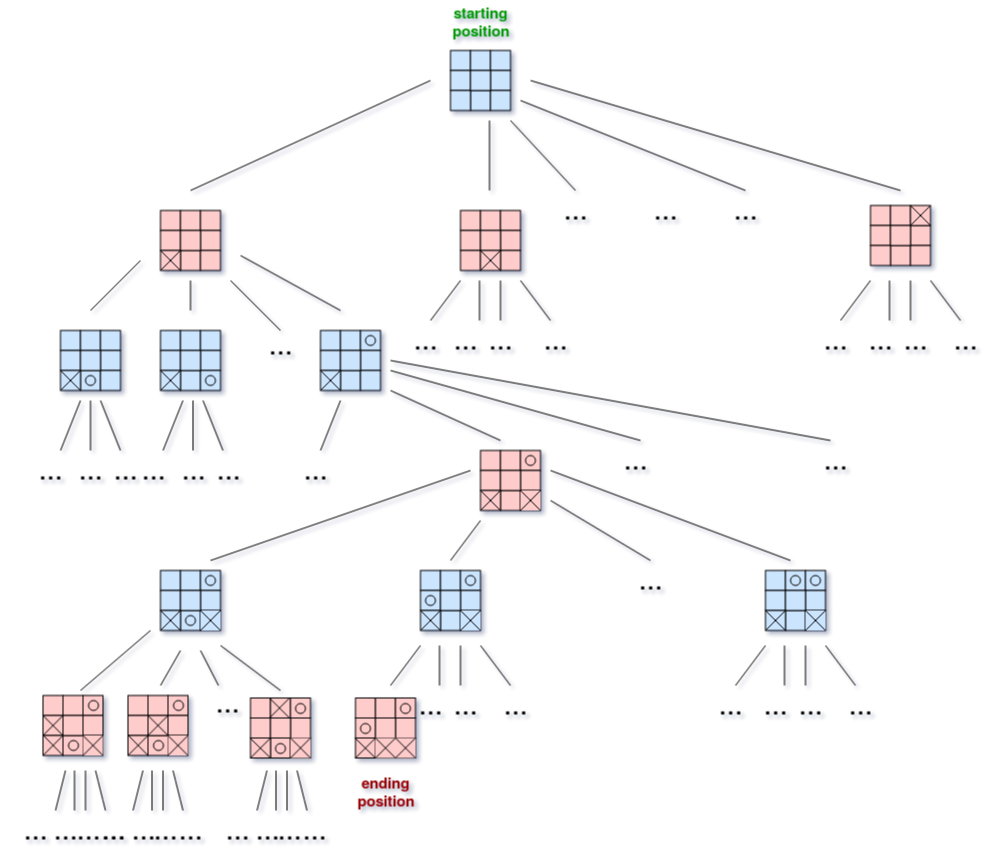


## Theory Behind Minimax
The Minimax algorithm relies on systematic searching, or more accurately said - on brute force and a simple evaluation function. Let's assume that every time during deciding the next move we search through a whole tree, all the way down to leaves. Effectively we would look into all the possible outcomes and every time we would be able to determine the best possible move.

However, for non-trivial games, that practice is inapplicable. Even searching to a certain depth sometimes takes an unacceptable amount of time. Therefore, Minimax applies search to a fairly low tree depth aided with appropriate heuristics, and a well designed, yet simple evaluation function.

With this approach we lose the certainty in finding the best possible move, but in the majority of cases the decision that minimax makes is much better than that of any human.

This trade-off between optimality and efficiency is a defining challenge in artificial intelligence and machine learning development for real-time systems.

Now, let's take a closer look at the evaluation function we've previously mentioned. In order to determine a good (not necessarily the best) move for a certain player, we have to somehow evaluate nodes (positions) to be able to compare one to another by quality.

The evaluation function is a static number that, in accordance with the characteristics of the game itself, is being assigned to each node (position).

It is important to mention that the evaluation function must not rely on the search of previous nodes, nor of the following. It should simply analyze the game state and circumstances that both players are in.

It is necessary that the evaluation function contains as much relevant information as possible, but on the other hand - since it's being calculated many times - it needs to be simple.

Usually it maps the set of all possible positions into symmetrical segment:

F
:
P
→
[
−
M
,
M
]

Value of M is assigned only to leaves where the winner is the first player, and value -M to leaves where the winner is the second player.

In zero-sum games, the value of the evaluation function has an opposite meaning - what's better for the first player is worse for the second, and vice versa. Hence, the value for symmetric positions (if players switch roles) should be different only by sign.

A common practice is to modify evaluations of leaves by subtracting the depth of that exact leaf, so that out of all moves that lead to victory the algorithm can pick the one that does it in the smallest number of steps (or picks the move that postpones loss if it is inevitable).

 Here's a simple illustration of Minimax' steps. We're looking for the minimum value, in this case.

The green layer calls the Max() method on nodes in the child nodes and the red layer calls the Min() method on child nodes.

Evaluating leaves:
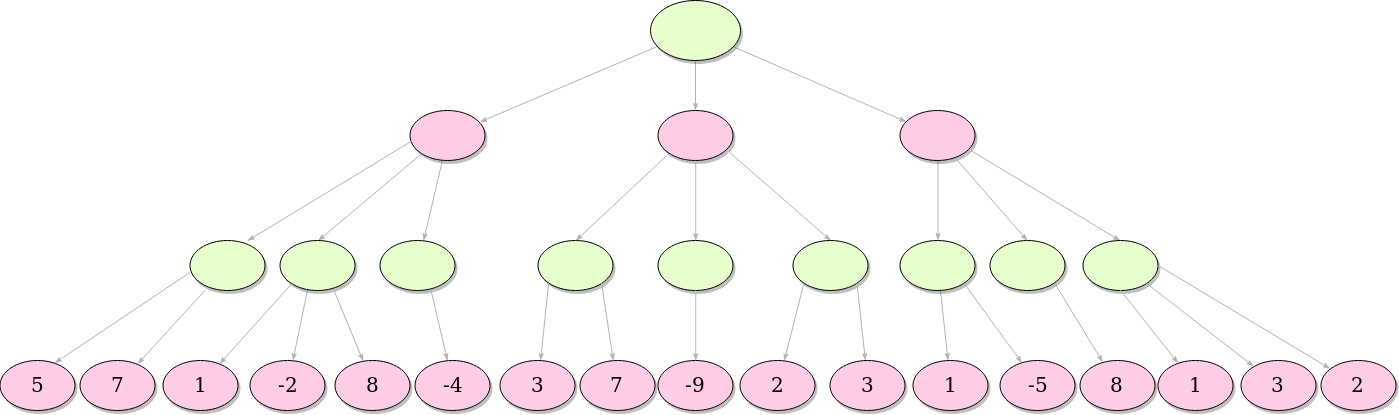

Deciding the best move for green player using depth 3:
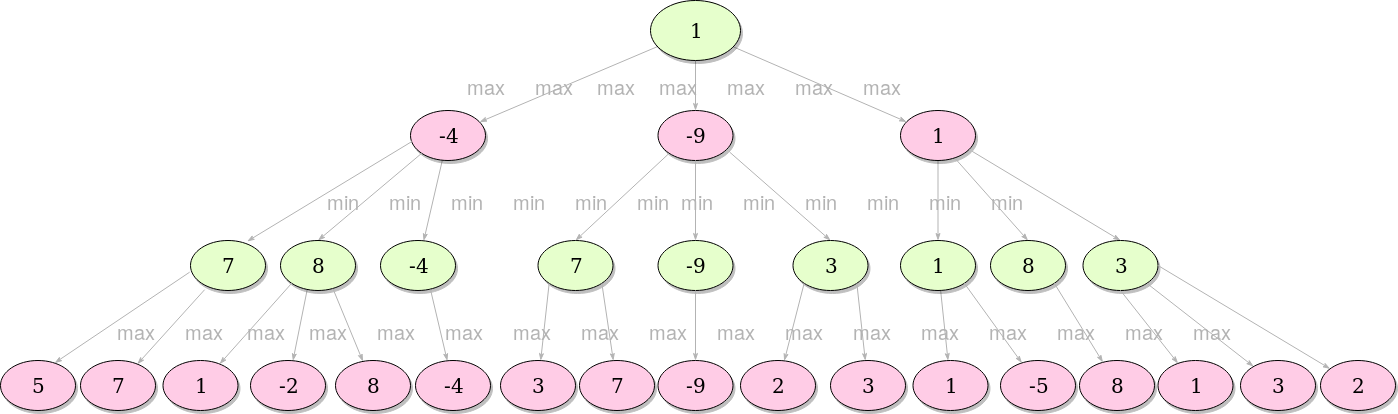
The idea is to find the best possible move for a given node, depth, and evaluation function.

In this example we've assumed that the green player seeks positive values, while the pink player seeks negative. The algorithm primarily evaluates only nodes at the given depth, and the rest of the procedure is recursive. The values of the rest of the nodes are the maximum values of their respective children if it's green player's turn, or, analogously, the minimum value if it's pink player's turn. The value in each node represents the next best move considering given information.

While searching the game tree, we're examining only nodes on a fixed (given) depth, not the ones before, nor after. This phenomenon is often called the horizon effect.

# Minimax Implementation in Python
In the code below, we will be using an evaluation function that is fairly simple and common for all games in which it's possible to search the whole tree, all the way down to leaves.

It has 3 possible values:

-1 if player that seeks minimum wins
0 if it's a tie
1 if player that seeks maximum wins
Since we'll be implementing this through a tic-tac-toe game, let's go through the building blocks. First, let's make a constructor and draw out the board:

The AI we play against is seeking two things - to maximize its own score and to minimize ours. To do that, we'll have a max() method that the AI uses for making optimal decisions.

However, we will also include a min() method that will serve as a helper for us to minimize the AI's score:

And ultimately, let's make a game loop that allows us to play against the AI:

In [1]:
class Game:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]
        self.player_turn = 'X'  # X starts (human)  (max isO and O is machine )

    # ---------- UI ----------
    def draw_board(self):
        for i in range(3):
            for j in range(3):
                print(f"{self.current_state[i][j]}|", end=" ")
            print()
        print()

    # ---------- Rules ----------
    def is_valid(self, px, py):
        if px < 0 or px > 2 or py < 0 or py > 2:
            return False
        return self.current_state[px][py] == '.'

    def is_end(self):
        s = self.current_state
        # Columns
        for i in range(3):
            if s[0][i] != '.' and s[0][i] == s[1][i] == s[2][i]:
                return s[0][i]
        # Rows
        for i in range(3):
            if s[i] == ['X','X','X']:
                return 'X'
            if s[i] == ['O','O','O']:
                return 'O'
        # Diagonals
        if s[0][0] != '.' and s[0][0] == s[1][1] == s[2][2]:
            return s[0][0]
        if s[0][2] != '.' and s[0][2] == s[1][1] == s[2][0]:
            return s[0][2]
        # Any empty cell?
        for i in range(3):
            for j in range(3):
                if s[i][j] == '.':
                    return None
        return '.'  # tie

    # ---------- Plain Minimax (O = MAX(machine), X = MIN(human )) ----------
    # returns (score, row, col) where score ∈ {-1, 0, 1}
    def max_player(self):
        result = self.is_end()
        if result == 'X': return (-1, 0, 0)  # X already won → worst for O
        if result == 'O': return ( 1, 0, 0)  # O already won → best for O
        if result == '.': return ( 0, 0, 0)   # tie on board → neutral

        best = -2   # start lower than the worst possible (-1)
        px = py = None   # will store best move for O
# Try every empty cell as O's move
        for i in range(3):
            for j in range(3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'O'
                    m, _, _ = self.min_player()
                    if m > best:
                        best = m; px = i; py = j
                    self.current_state[i][j] = '.'
        return (best, px, py)

    def min_player(self):
        result = self.is_end()
        if result == 'X': return (-1, 0, 0)
        if result == 'O': return ( 1, 0, 0)
        if result == '.': return ( 0, 0, 0)

        best = 2
        qx = qy = None

        for i in range(3):
            for j in range(3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    m, _, _ = self.max_player()
                    if m < best:
                        best = m; qx = i; qy = j
                    self.current_state[i][j] = '.'
        return (best, qx, qy)

    # ---------- Game loop ----------
    def play(self):
        while True:
            self.draw_board()
            result = self.is_end()

            if result is not None:
                if result == 'X':
                    print('The winner is X!')
                elif result == 'O':
                    print('The winner is O!')
                else:
                    print("It’s a tie!")
                self.initialize_game()
                return

            if self.player_turn == 'X':
                # Human move (you can switch to auto by using self.min_player())
                sug, sx, sy = self.min_player()
                print(f"Suggested for X: ({sx},{sy})  score={sug}")
                try:
                    px = int(input('Row [0-2]: '))
                    py = int(input('Col [0-2]: '))
                except Exception:
                    print("Invalid input, try again.")
                    continue

                if self.is_valid(px, py):
                    self.current_state[px][py] = 'X'
                    self.player_turn = 'O'
                else:
                    print('Move not valid! Try again.')
            else:
                # AI (O) uses Minimax MAX
                m, px, py = self.max_player()
                print(f"AI (O) plays: ({px},{py})  score={m}")
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'



In [ ]:
def main():
    g = Game()
    g.play()

if __name__ == "__main__":
    main()
             

.| .| .| 
.| .| .| 
.| .| .| 

Suggested for X: (0,0)  score=0


## Alpha-Beta Pruning
Alpha–beta (𝛼−𝛽) algorithm was discovered independently by a few researchers in the mid 1900s. Alpha–beta is actually an improved minimax using a heuristic. It stops evaluating a move when it makes sure that it's worse than the previously examined move. Such moves need not to be evaluated further.

When added to a simple minimax algorithm, it gives the same output, but cuts off certain branches that can't possibly affect the final decision - dramatically improving the performance.

The main concept is to maintain two values through whole search:

Alpha: Best already explored option for player Max
Beta: Best already explored option for player Min
Initially, alpha is negative infinity and beta is positive infinity, i.e. in our code we'll be using the worst possible scores for both players.

Let's see how the previous tree will look if we apply alpha-beta method:
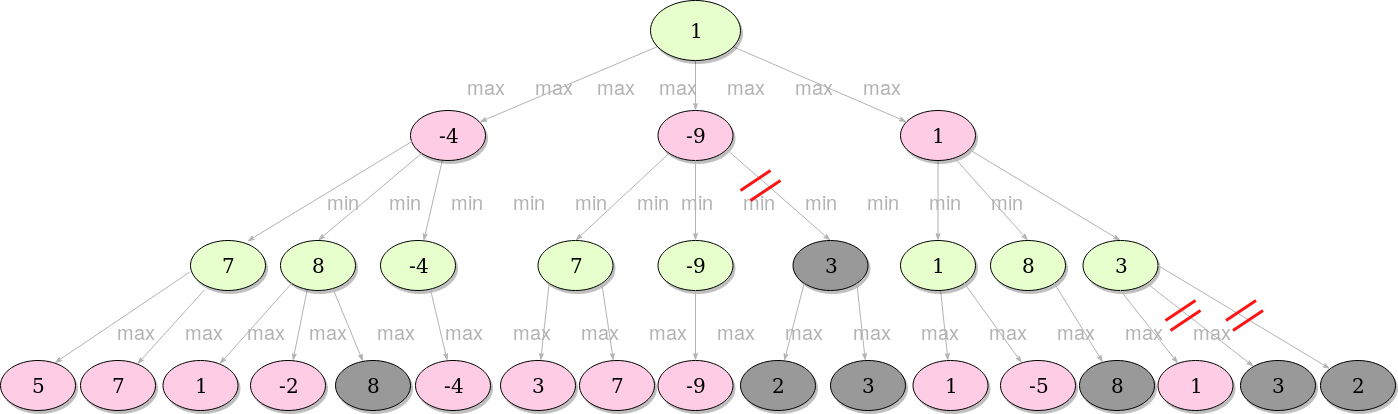
When the search comes to the first gray area (8), it'll check the current best (with minimum value) already explored option along the path for the minimizer, which is at that moment 7. Since 8 is bigger than 7, we are allowed to cut off all the further children of the node we're at (in this case there aren't any), since if we play that move, the opponent will play a move with value 8, which is worse for us than any possible move the opponent could have made if we had made another move.

A better example may be when it comes to the next gray. Note the nodes with value -9. At that point, the best (with maximum value) explored option along the path for the maximizer is -4. Since -9 is less than -4, we are able to cut off all the other children of the node we're at.

ADVERTISEMENT
This method allows us to ignore many branches that lead to values that won't be of any help for our decision, nor they would affect it in any way.

With that in mind, let's modify the min() and max() methods from before:

In [ ]:
import time

class Game:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.current_state = [['.','.','.'],
                              ['.','.','.'],
                              ['.','.','.']]
        self.player_turn = 'X'  # human (MIN) starts

    def draw_board(self):
        for i in range(3):
            print(" ".join(f"{c}|" for c in self.current_state[i]))
        print()

    def is_valid(self, px, py):
        return 0 <= px <= 2 and 0 <= py <= 2 and self.current_state[px][py] == '.'

    def is_end(self):
        s = self.current_state
        # columns
        for i in range(3):
            if s[0][i] != '.' and s[0][i] == s[1][i] == s[2][i]:
                return s[0][i]
        # rows
        for i in range(3):
            if s[i] == ['X','X','X']: return 'X'
            if s[i] == ['O','O','O']: return 'O'
        # diagonals
        if s[0][0] != '.' and s[0][0] == s[1][1] == s[2][2]: return s[0][0]
        if s[0][2] != '.' and s[0][2] == s[1][1] == s[2][0]: return s[0][2]
        # empty cells?
        for i in range(3):
            for j in range(3):
                if s[i][j] == '.': return None
        return '.'  # tie

    # ---------- Alpha–Beta (O = MAX, X = MIN) ----------
    # return (score, row, col) with score in {-1, 0, 1}
    def max_alpha_beta(self, alpha, beta):
        result = self.is_end()
        if result == 'X': return (-1, 0, 0)
        if result == 'O': return ( 1, 0, 0)
        if result == '.': return ( 0, 0, 0)

        maxv, px, py = -2, None, None
        for i in range(3):
            for j in range(3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'O'
                    m, _, _ = self.min_alpha_beta(alpha, beta)  # <-- fixed unpack
                    self.current_state[i][j] = '.'
                    if m > maxv:
                        maxv, px, py = m, i, j
                    if maxv >= beta:
                        return (maxv, px, py)   # β cutoff
                    if maxv > alpha:
                        alpha = maxv
        return (maxv, px, py)

    def min_alpha_beta(self, alpha, beta):
        result = self.is_end()
        if result == 'X': return (-1, 0, 0)
        if result == 'O': return ( 1, 0, 0)
        if result == '.': return ( 0, 0, 0)

        minv, qx, qy = 2, None, None
        for i in range(3):
            for j in range(3):
                if self.current_state[i][j] == '.':
                    self.current_state[i][j] = 'X'
                    m, _, _ = self.max_alpha_beta(alpha, beta)
                    self.current_state[i][j] = '.'
                    if m < minv:
                        minv, qx, qy = m, i, j
                    if minv <= alpha:
                        return (minv, qx, qy)   # α cutoff
                    if minv < beta:
                        beta = minv
        return (minv, qx, qy)

    # ---------- Game loop (alpha–beta) ----------
    def play_alpha_beta(self):
        while True:
            self.draw_board()
            result = self.is_end()
            if result is not None:
                if result == 'X': print('The winner is X!')
                elif result == 'O': print('The winner is O!')
                else: print("It’s a tie!")
                self.initialize_game()
                return

            if self.player_turn == 'X':
                while True:
                    start = time.time()
                    m, qx, qy = self.min_alpha_beta(-2, 2)
                    end = time.time()
                    print(f'Evaluation time: {end-start:.6f}s')
                    print(f'Recommended move for X: ({qx}, {qy})')
                    try:
                        px = int(input('Insert row [0-2]: '))
                        py = int(input('Insert col [0-2]: '))
                    except Exception:
                        print("Invalid input. Try again.")
                        continue
                    if self.is_valid(px, py):
                        self.current_state[px][py] = 'X'
                        self.player_turn = 'O'
                        break
                    else:
                        print('Move not valid! Try again.')
            else:
                m, px, py = self.max_alpha_beta(-2, 2)
                print(f"AI (O) plays: ({px}, {py})  score={m}")
                self.current_state[px][py] = 'O'
                self.player_turn = 'X'

if __name__ == "__main__":
    Game().play_alpha_beta()


.| .| .|
.| .| .|
.| .| .|

Evaluation time: 0.342628s
Recommended move for X: (0, 0)
Insert row [0-2]: 0
Insert col [0-2]: 0
X| .| .|
.| .| .|
.| .| .|

AI (O) plays: (1, 1)  score=0
X| .| .|
.| O| .|
.| .| .|

Evaluation time: 0.010101s
Recommended move for X: (0, 1)


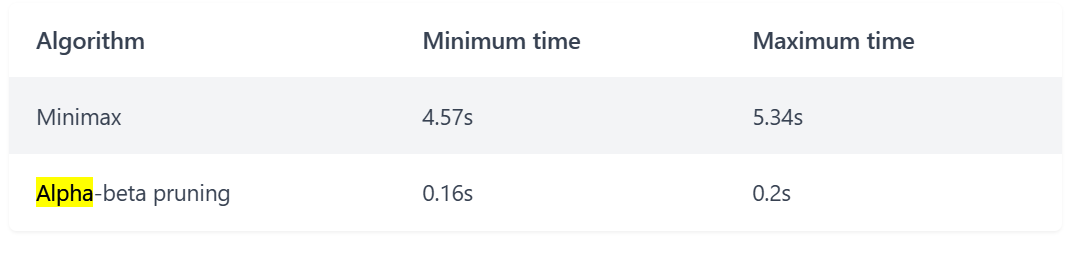

# Conclusion
Alpha-beta pruning makes a major difference in evaluating large and complex game trees. Even though tic-tac-toe is a simple game itself, we can still notice how without alpha-beta heuristics the algorithm takes significantly more time to recommend the move in the first turn.